In [83]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [84]:
dataset = pd.read_csv('D14data1.csv')

In [85]:
dataset.shape

(200, 5)

In [86]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [87]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [88]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [89]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [90]:
x = dataset.iloc[:,[3,4]].values

Text(0.5, 1.0, 'DEndogram')

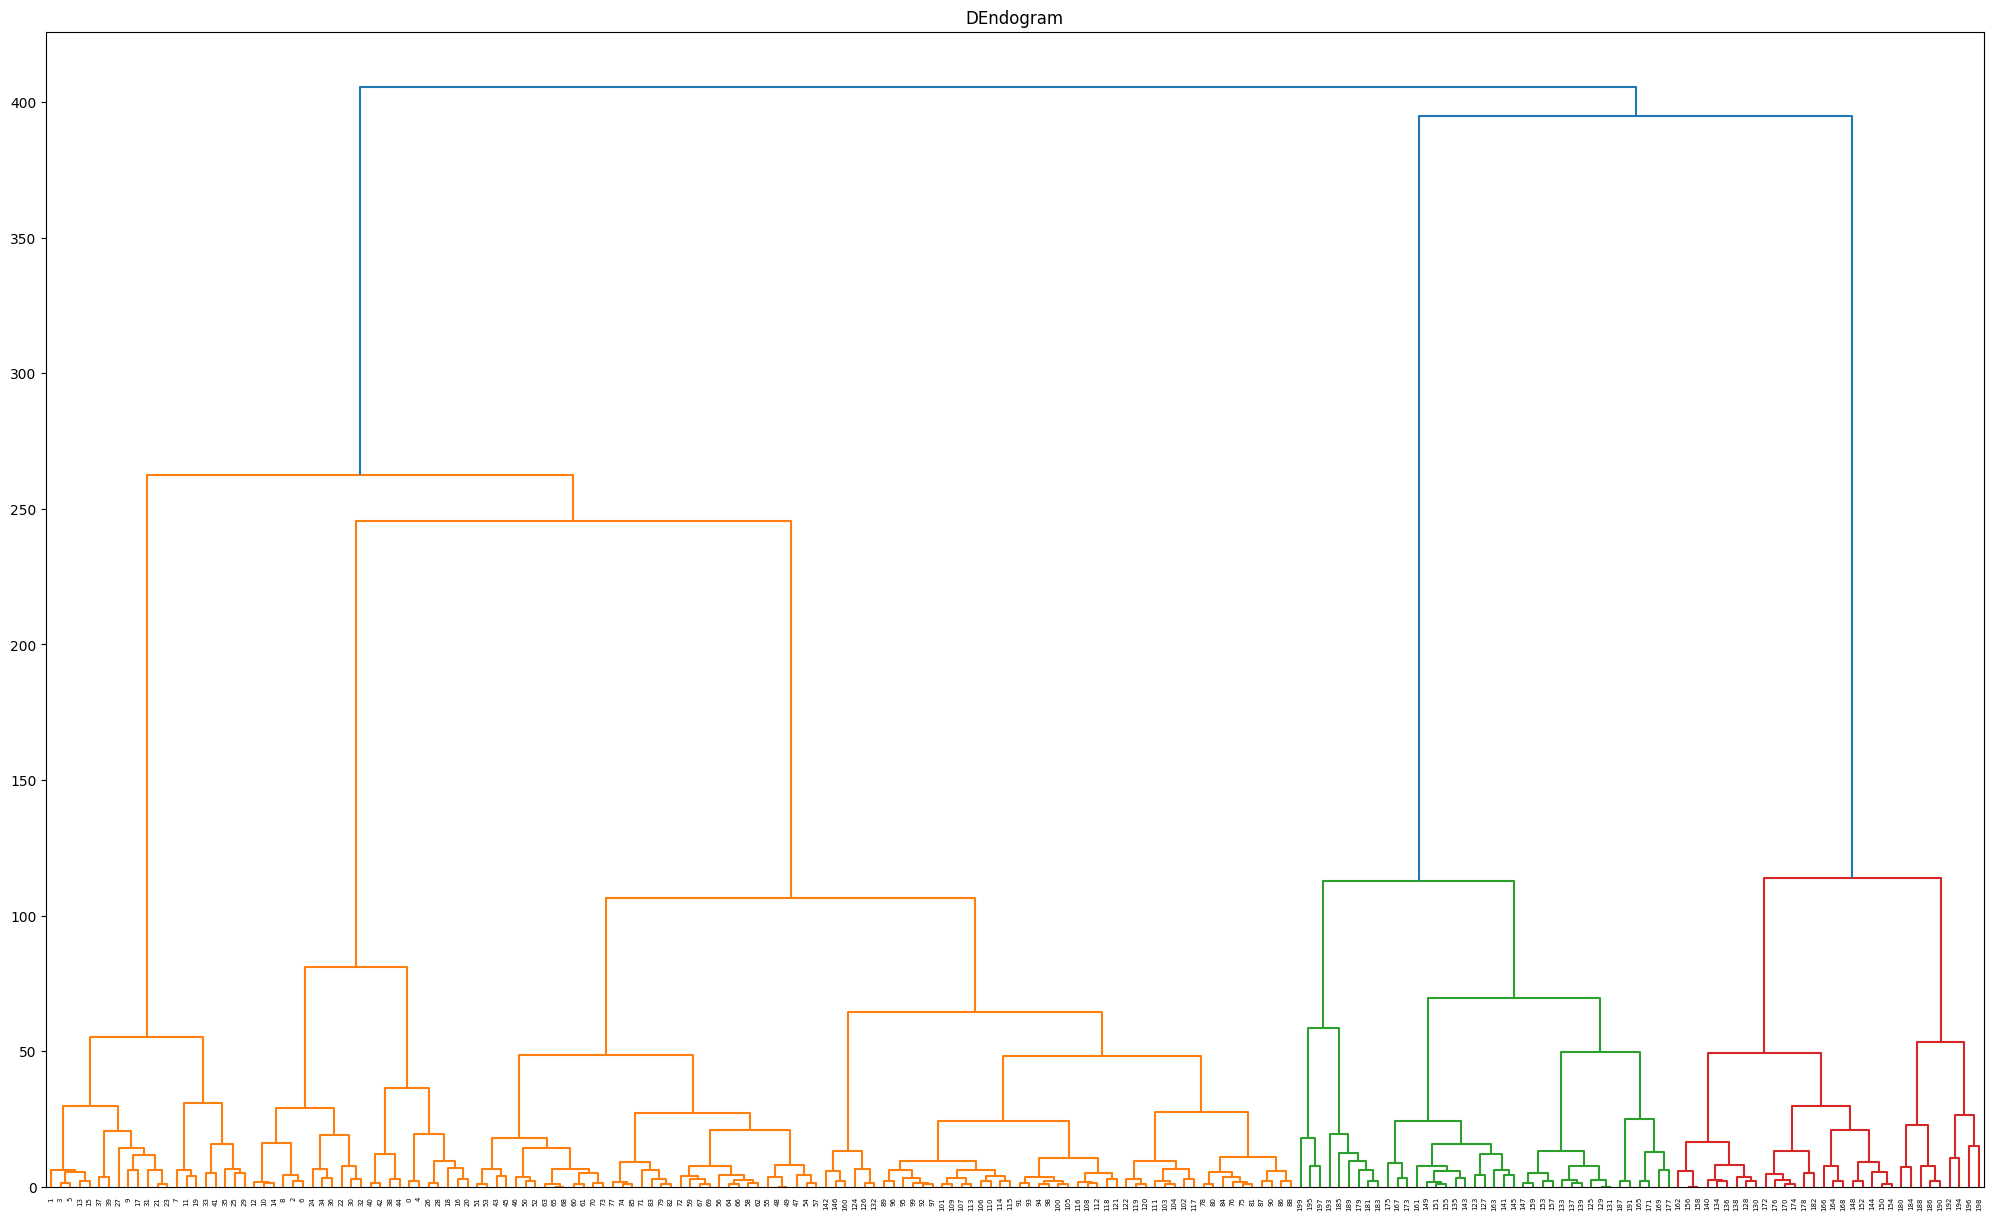

In [91]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(25,15))
sch.dendrogram(sch.linkage(x,method='ward'))

plt.title('DEndogram')

In [92]:
from sklearn.cluster import AgglomerativeClustering
mol = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')

In [93]:
y_hc = mol.fit_predict(x)

# Visualising the clusters

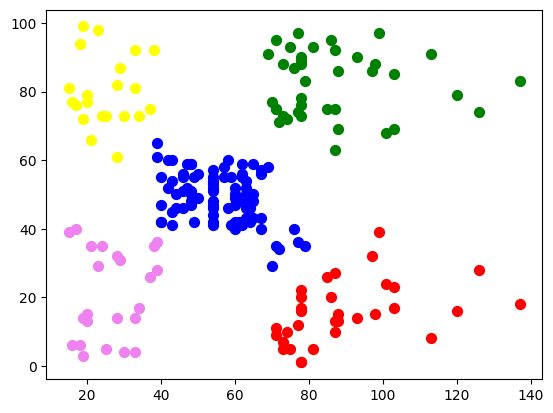

In [94]:
plt.scatter(x[y_hc ==0,0],x[y_hc==0,1],s=50,c='red')
plt.scatter(x[y_hc ==1,0],x[y_hc==1,1],s=50,c='blue')
plt.scatter(x[y_hc ==2,0],x[y_hc==2,1],s=50,c='green')
plt.scatter(x[y_hc ==3,0],x[y_hc==3,1],s=50,c='yellow')
plt.scatter(x[y_hc ==4,0],x[y_hc==4,1],s=50,c='violet')

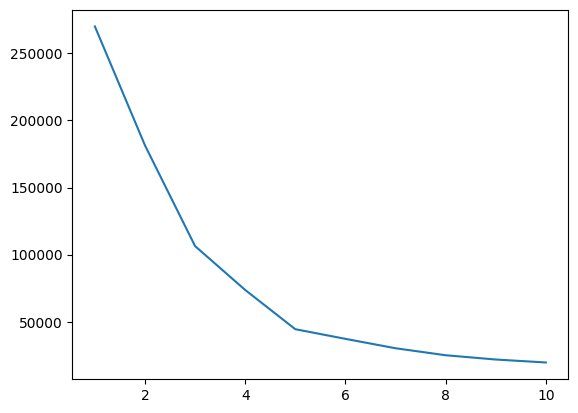

In [95]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
    